<a href="https://colab.research.google.com/github/xxxnmxhj00/Deep-Learning/blob/main/6_3%20%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM(Long Shor-Term Memory)

단순한 순환 신경망의 문제점
- 시점이 흐를수록 지속해서 기억하지 못한다
- 그래디언트 손실 문제
- 연산을 많이 하는 이유 : 장단기 메모리 기법을 해결하기 위해

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

max_len = 350

pad_x_train = pad_sequences(X_train, maxlen=max_len)
pad_x_test = pad_sequences(X_test, maxlen=max_len)

print(len(pad_x_train[0]))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
350


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 128))
model.add(LSTM(128, return_sequences= True))
model.add(LSTM(64, return_sequences= True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(pad_x_train, y_train,
                    batch_size=32, epochs=20,
                    validation_split=0.2)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 38ms/step - acc: 0.7114 - loss: 0.5429 - val_acc: 0.8288 - val_loss: 0.4100
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - acc: 0.8477 - loss: 0.3740 - val_acc: 0.7710 - val_loss: 0.6244
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - acc: 0.7205 - loss: 0.5358 - val_acc: 0.8652 - val_loss: 0.3371
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - acc: 0.9148 - loss: 0.2302 - val_acc: 0.8868 - val_loss: 0.2926
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - acc: 0.9387 - loss: 0.1670 - val_acc: 0.8778 - val_loss: 0.3095
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - acc: 0.9624 - loss: 0.1148 - val_acc: 0.8850 - val_loss: 0.3247
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - acc: 0.9700 - loss: 0.0918 - val_acc: 0.8794 - val_loss: 0.3891
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - acc: 0.9793 - loss: 0.0648 - val_acc: 0.8696 - val_loss: 0.4236
Epoch 9/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 

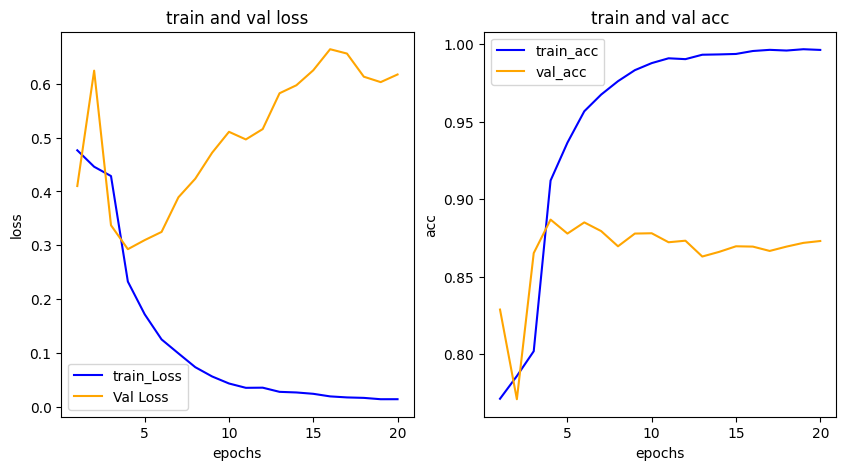

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

로이터 데이터셋

- IMDB 데이터셋과 유사함
- 클래스 46개 , 출럭뉴런 46

In [ ]:
from tensorflow.keras.datasets import reuters

num_words = 10000
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(8982,) (8982,)
(2246,) (2246,)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_x_train = pad_sequences(X_train, maxlen=max_len)
pad_x_test = pad_sequences(X_test, maxlen=max_len)

print(len(pad_x_train[0]))

500


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential() # Sequential은 레이어를 순차적으로 쌓는 방식의 모델

model.add(Embedding(input_dim = num_words, output_dim = 64))
model.add(LSTM(64, return_sequences= True))
model.add(LSTM(32))
model.add(Dense(46, activation='softmax')) # Dense(46)는 출력 레이어로, 46개의 클래스로 분류할 수 있도록 합니다.
# activation='softmax'는 다중 클래스 분류 문제에서 각 클래스에 대한 확률을 출력하기 위해 사용됩니다.


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(pad_x_train, y_train,
                    batch_size=32, epochs=10,
                    validation_split=0.2)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - acc: 0.3502 - loss: 2.8290 - val_acc: 0.4875 - val_loss: 2.1096
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - acc: 0.5073 - loss: 2.0533 - val_acc: 0.4942 - val_loss: 2.0093
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - acc: 0.5220 - loss: 1.9315 - val_acc: 0.5019 - val_loss: 1.9699
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - acc: 0.5204 - loss: 1.9583 - val_acc: 0.5003 - val_loss: 1.9293
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - acc: 0.5197 - loss: 1.8295 - val_acc: 0.5565 - val_loss: 1.7006
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - acc: 0.5803 - loss: 1.6159 - val_acc: 0.5804 - val_loss: 1.6427
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - acc: 0.5963 - loss: 1.5301 - val_acc: 0.5943 - val_loss: 1.6137
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - acc: 0.6330 - loss: 1.4436 - val_acc: 0.6032 - val_loss: 1.5814
Epoch 9/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 

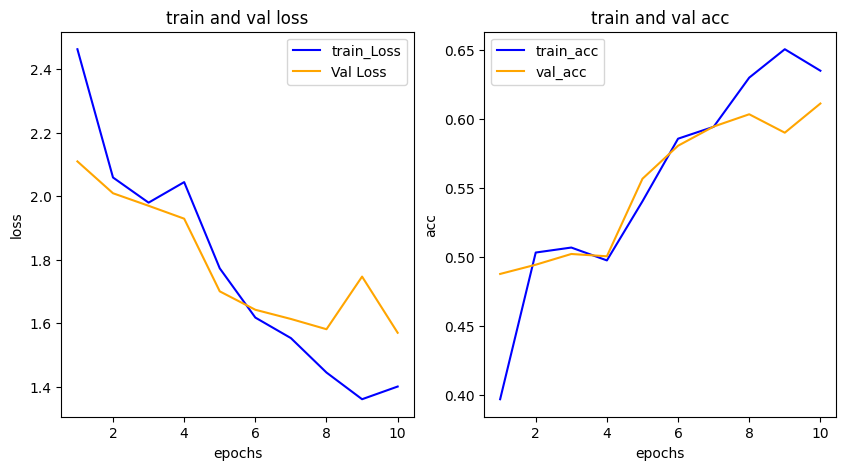

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

Conv1D

- 컨볼루션 연산

Conv1D 1D형태를 가닌 컨볼루션 필터로 컨볼루션 연산을 수행하여 시퀀스 데이터의 특징을 추출

Conv2D 2D형태를 가닌 컨볼루션 필터로 컨볼루션 연산을 수행하여 이미지 특징을 추출


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

max_len = 350

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, MaxPooling1D

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32))


model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(7))

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPooling1D(5))

model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])



In [ ]:
history = model.fit(pad_X_train, y_train,
                    batch_size=32, epochs=10,
                    validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.5983 - loss: 0.6139 - val_acc: 0.8658 - val_loss: 0.3157
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9073 - loss: 0.2372 - val_acc: 0.8778 - val_loss: 0.2960
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.9584 - loss: 0.1263 - val_acc: 0.8784 - val_loss: 0.3315
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9866 - loss: 0.0542 - val_acc: 0.8726 - val_loss: 0.4471
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9965 - loss: 0.0192 - val_acc: 0.8734 - val_loss: 0.5509
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9998 - loss: 0.0054 - val_acc: 0.8636 - val_loss: 0.6797
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 1.0000 - loss: 0.0012 - val_acc: 0.8642 - val_loss: 0.7371
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 1.0000 - loss: 5.1643e-04 - val_acc: 0.8692 - val_loss: 0.7483
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step 

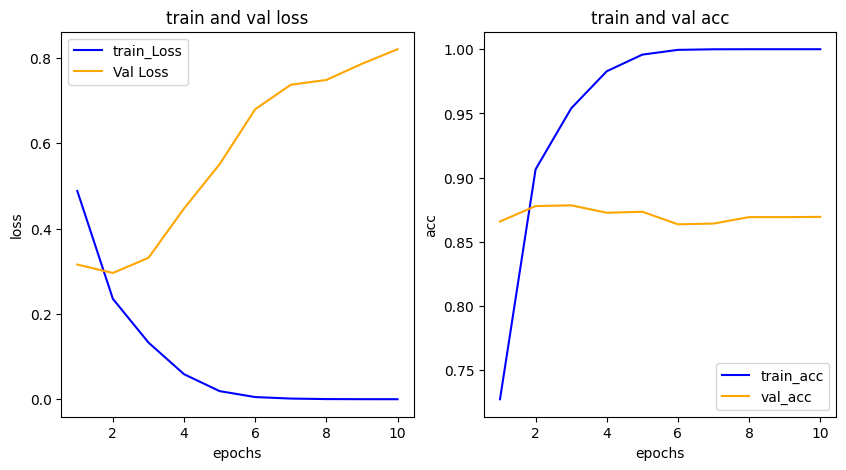

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
# Conv1D + LSTM

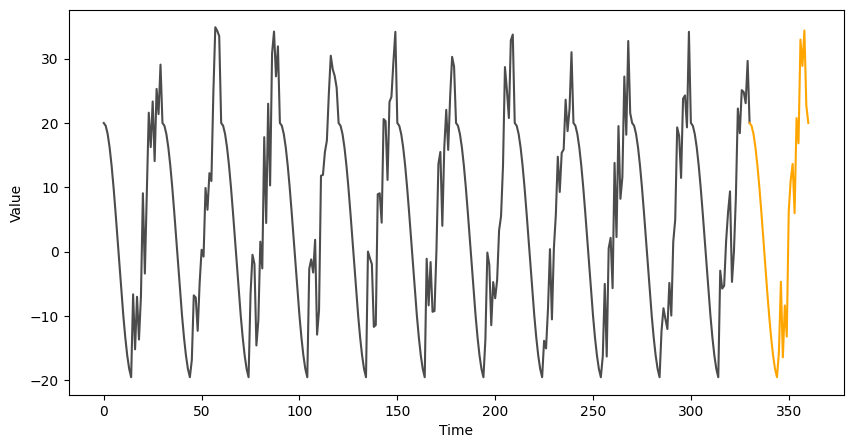

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time <0.5,
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(361))

plt.figure(figsize = (10, 5))
plt.xlabel('Time')
plt.ylabel('Value')
# 학습용 데이터
plt.plot(np.arange(0, 30 * 11 + 1),
         time_series[:30 * 11 + 1],
         color = 'black', alpha = 0.7)
# 테스트용 데이터
plt.plot(np.arange(30 * 11, 30 * 12 + 1),
         time_series[30 * 11:],
         color = 'orange')

In [ ]:
def make_sequence(time_series, n):
  x_train, y_train = list(), list()

  for i in range(len(time_series)):
    x = time_series[i:(i + n)]
    if (i + n) < len(time_series):
      x_train.append(x)
      y_train.append(time_series[i + n])
    else:
      break

  return np.array(x_train), np.array(y_train)

n = 10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train:', patial_x_train.shape, patial_y_train.shape)
print('test:', x_test.shape, y_test.shape)

train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Input
from tensorflow.keras.layers import LSTM

model = Sequential()

model.add(Input(shape=(10, 1)))
model.add(Conv1D(32, 3, activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation = 'relu'))
# LSTM을 혼합하여 모델을 구성
model.add(LSTM(32,dropout = 0.2, recurrent_dropout = 0.2, activation = 'tanh'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 238.9782 - mse: 238.9782
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 200.8429 - mse: 200.8429
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 183.0549 - mse: 183.0549
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 158.5383 - mse: 158.5383
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 134.8491 - mse: 134.8491
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 112.9156 - mse: 112.9156
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 97.4149 - mse: 97.4149
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 90.5909 - mse: 90.5909
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 81.8291 - mse: 81.8291
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 75.8395 - mse: 75.8395
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 76.2659 - mse: 76.2659
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 73.8559 - mse:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


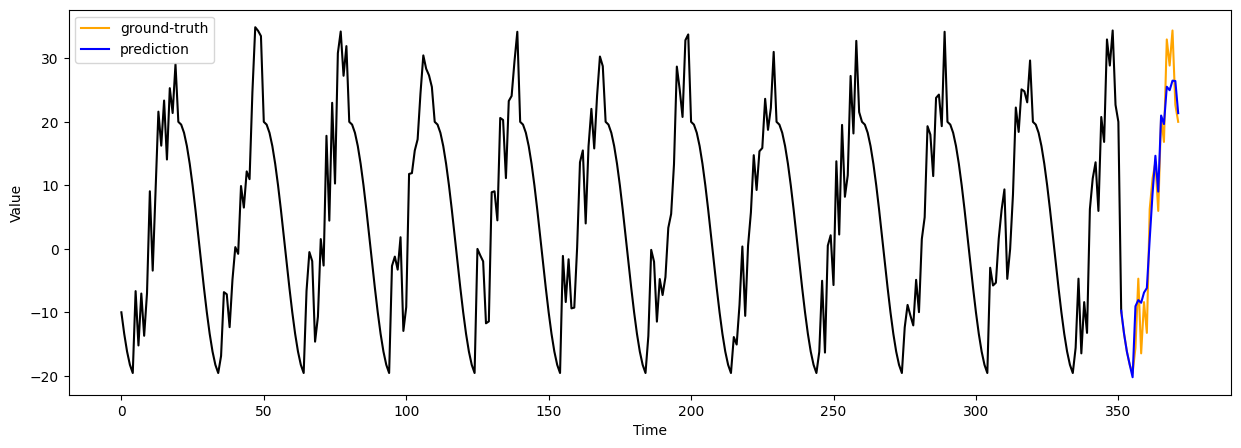

In [ ]:
pred = model.predict(x_test)

train_range = np.arange(len(x_train) + 1)
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize = (15, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(train_range, np.append(y_train, y_test[0]), color = 'black')
plt.plot(pred_range, y_test, color = 'orange', label='ground-truth')
plt.plot(pred_range, pred, color ='blue', label='prediction')
plt.legend()
plt.show()